In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import h2o
from h2o.automl import H2OAutoML
h2o.init()

def get_ECFP4(row):
    return AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(row), 4, nBits=2048).ToList()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "16.0.2" 2021-07-20; OpenJDK Runtime Environment Homebrew (build 16.0.2+0); OpenJDK 64-Bit Server VM Homebrew (build 16.0.2+0, mixed mode, sharing)
  Starting server from /Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmpjgj9dsc7
  JVM stdout: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmpjgj9dsc7/h2o_ogurb_started_from_python.out
  JVM stderr: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmpjgj9dsc7/h2o_ogurb_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_ogurb_g4xs3t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [3]:
reg_aml = h2o.load_model("trained_models/h2o.reg.best/StackedEnsemble_AllModels_2_AutoML_1_20220314_192635")

# Regression

In [9]:
reg_df = pd.read_csv('reg_dataset.csv')

reg_df['ECFP4'] = reg_df.SMILES.apply(get_ECFP4)
df = pd.DataFrame(reg_df['ECFP4'].to_list())
df['log10Ki'] = reg_df['log10Ki']
df = df.set_index(reg_df['SMILES'])
df.columns = list(map(str, df.columns))
df.to_csv('reg_dataset_ECFP4.csv', index=False)

print(df.shape)
df.head(2)

(3940, 2049)


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,log10Ki
SMILES,,,,,,,,,,,,,,,,,,,,,
N=C(N)c1cccc(CN2CCN(S(=O)(=O)c3cc4ccc(Cl)cc4s3)CC2=O)c1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.60206
N=C(N)c1ccc(CN2CCN(S(=O)(=O)c3cc4ccc(Cl)cc4s3)CC2=O)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.60206


In [10]:
df2 = pd.read_csv('reg_dataset_ECFP4.csv')
print(df2.shape)
df2.head(2)

(3940, 2049)


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,log10Ki
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.60206
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.60206


In [4]:
df = h2o.import_file('reg_dataset_ECFP4.csv', header=1)

print(df.shape)
print(df.columns[:5], df.columns[-5:])
df.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(3940, 2049)
['0', '1', '2', '3', '4'] ['2044', '2045', '2046', '2047', 'log10Ki']


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
%%time

y = "log10Ki"
x = list(df.columns)
x.remove(y)

aml = H2OAutoML(nfolds=5,
                max_runtime_secs_per_model=120,
                stopping_rounds=10,
                keep_cross_validation_fold_assignment=True,
                seed=1)
aml.train(x=x,
          y="log10Ki",
          training_frame=df)

model_path = h2o.save_model(model=aml,
                            path="trained_models/h2o.reg.best",
                            force=True)
print(f'The best model was saved: {model_path}')

In [6]:
lb = aml.leaderboard
lb.head(5)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_3_AutoML_1_20220319_223540,0.495308,0.703781,0.495308,0.496441,nan
StackedEnsemble_AllModels_4_AutoML_1_20220319_223540,0.496514,0.704638,0.496514,0.497352,nan
StackedEnsemble_AllModels_2_AutoML_1_20220319_223540,0.518155,0.71983,0.518155,0.511263,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20220319_223540,0.519119,0.720499,0.519119,0.52102,nan
StackedEnsemble_AllModels_1_AutoML_1_20220319_223540,0.525658,0.725023,0.525658,0.517632,nan


In [8]:
print(f'R2: Train - {aml.get_best_model().r2()}, Test - {aml.get_best_model().r2(xval=True)}')
print(f'MSE: Train - {aml.get_best_model().mse()}, Test - {aml.get_best_model().mse(xval=True)}')
print(f'RMSE: Train - {aml.get_best_model().rmse()}, Test - {aml.get_best_model().rmse(xval=True)}')
print(f'MAE: Train - {aml.get_best_model().mae()}, Test - {aml.get_best_model().mae(xval=True)}')
# print(f'MAPE: Train - {aml.get_best_model().mape()}, Test - {aml.get_best_model().mape(valid=True)}')

R2: Train - 0.9792536818140897, Test - 0.8274297826399788
MSE: Train - 0.05954570070748741, Test - 0.4953078624295191
RMSE: Train - 0.2440198776892723, Test - 0.7037811182672629
MAE: Train - 0.16317749065745799, Test - 0.4964413189610119


In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.std_coef_plot()

Exception ignored in: <function ExprNode.__del__ at 0x16a372ee0>
Traceback (most recent call last):
  File "/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/expr.py", line 204, in __del__
    ExprNode.rapids("(rm {})".format(self._cache._id))
  File "/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/expr.py", line 258, in rapids
    return h2o.api("POST /99/Rapids", data={"ast": expr, "session_id": h2o.connection().session_id})
  File "/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/h2o.py", line 124, in api
    return h2oconn.request(endpoint, data=data, json=json, filename=filename, save_to=save_to)
  File "/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/backend/connection.py", line 472, in request
    resp = requests.request(method=method, url=url, data=data, json=json, files=files, params=params,
  File "/Users/ogurb/miniconda3/lib/python3.8/site-packages/requests/api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)


AttributeError: 'Line2D' object has no attribute '_legmarker'

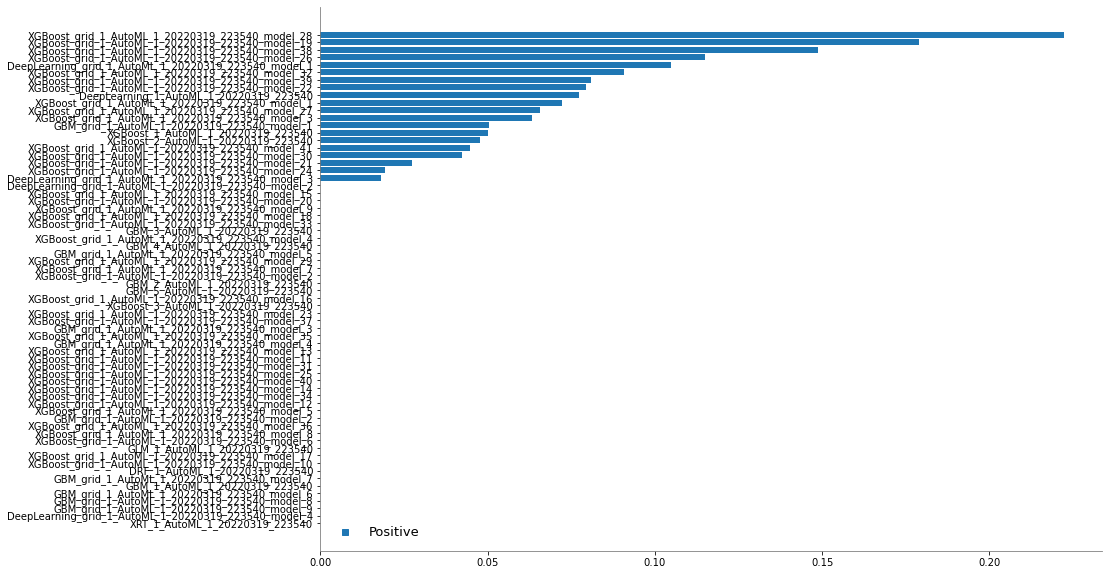

In [26]:
metalearner.std_coef_plot()

In [27]:
metalearner.coef()

{'Intercept': -0.01564553681770745,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_15': 0.0,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_20': 0.0,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_21': 0.017618041003529487,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_19': 0.11532934703495447,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_38': 0.09622365721483771,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_28': 0.14280503927810223,
 'GBM_grid_1_AutoML_1_20220319_223540_model_1': 0.03415485774524414,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_9': 0.0,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_30': 0.027411609878062685,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_39': 0.05257080328668694,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_41': 0.029166191653120104,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_32': 0.057676235283944104,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_22': 0.050623614403314914,
 'XGBoost_grid_1_AutoML_1_20220319_223540_model_3':

In [14]:
metalearner.actual_params

{'model_id': 'metalearner_AUTO_StackedEnsemble_AllModels_3_AutoML_1_20220319_223540',
 'training_frame': 'levelone_training_StackedEnsemble_AllModels_3_AutoML_1_20220319_223540',
 'validation_frame': None,
 'nfolds': 5,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 19,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'log10Ki',
 'ignored_columns': None,
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': 5,
 'offset_column': None,
 'weights_column': None,
 'family': 'gaussian',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.5, 1.0],
 'lambda': [0.00496485159037475, 0.0],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': False

In [31]:
metalearner._model_json['output']


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.004965 )",66,21,2,levelone_training_StackedEnsemble_AllModels_3_AutoML_1_20220319_22...



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_deviance,training_mae,training_r2
0,,2022-03-19 23:32:20,0.000 sec,2,957.441893,0.243006,1.0,0.0,0.486011,0.496413,0.222743,0.697807,0.486935,0.492784,0.830347



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-19 23:32:20,0.000 sec,1,773.640109,0.201369,1.0,0.004965,0.491825,0.465986,0.701302,0.491825,0.496102,0.829331,0.682632,0.465986,0.48273,0.835004



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-19 23:32:20,0.000 sec,1,779.269696,0.202778,1.0,0.004965,0.500334,0.443295,0.707389,0.500399,0.499149,0.826834,0.665804,0.443295,0.47435,0.84147



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-19 23:32:20,0.000 sec,1,758.719102,0.197591,1.0,0.004965,0.481421,0.513344,0.693845,0.481421,0.491265,0.829219,0.71648,0.513344,0.501692,0.83297



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-19 23:32:20,0.000 sec,1,754.455764,0.196528,1.0,0.004965,0.480698,0.516845,0.693375,0.480769,0.492326,0.833201,0.71892,0.516845,0.494589,0.816879



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-19 23:32:20,0.000 sec,1,761.962406,0.198401,1.0,0.004965,0.475039,0.542593,0.689263,0.475083,0.484717,0.834936,0.736609,0.542593,0.532842,0.808542



Node Information: 


,,node,h2o,healthy,last_ping,num_cpus,sys_load,mem_value_size,free_mem,pojo_mem,...,rpcs_active,nthreads,is_leader,total_mem,max_mem,java_version,jvm_launch_parameters,os_version,machine_physical_mem,machine_locale
0,,0,127.0.0.1:54323,true,1647725539427,10,21.623047,236330328.0,3.818661e+09,239975978.0,..., ,10,true,1.671430e+09,4.294967e+09,Java 16.0.2 (from Homebrew),[-ea],Mac OS X 12.3 (x86_64),1.717987e+10,en_UA



Cluster Configuration: 


,,h2o_cluster_uptime,h2o_cluster_timezone,h2o_data_parsing_timezone,h2o_cluster_version,h2o_cluster_version_age,h2o_cluster_name,h2o_cluster_total_nodes,h2o_cluster_free_memory,h2o_cluster_total_cores,h2o_cluster_allowed_cores,h2o_cluster_status,h2o_internal_security,h2o_api_extensions
0,,3766865.0,Europe/Kiev,UTC,3.36.0.3,1 month and 3 days,H2O_from_python_ogurb_g4xs3t,1,3.818661e+09,10,10,"locked, healthly",false,"Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncode..."



Input Frames Information: 


,,input_frame,checksum,espc
0,,training_frame,6.813478e+17,"[0, 97, 195, 294, 392, 491, 590, 688, 787, 885, 984, 1082, 1181, 1..."
1,,validation_frame,-1.000000e+00,-1



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4869349809468194
RMSE: 0.6978072663327743
MAE: 0.49278445112093944
RMSLE: NaN
R^2: 0.8303469783620729
Mean Residual Deviance: 0.4869349809468194
Null degrees of freedom: 3939
Residual degrees of freedom: 3918
Null deviance: 11308.51550068457
Residual deviance: 1918.5238249304684
AIC: 8391.91442545391

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4953078624295191
RMSE: 0.7037811182672629
MAE: 0.4964413189610119
RMSLE: NaN
R^2: 0.8274297826399788
Mean Residual Deviance: 0.4953078624295191
Null degrees of freedom: 3939
Residual degrees of freedom: 3919
Null deviance: 11309.649749049418
Residual deviance: 1951.5129779723052
AIC: 8457.087125824775

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.497240,0.022521,0.482730,0.474350,0.501692,0.494589,0.532842
1,mean_residual_deviance,0.496413,0.040571,0.465986,0.443295,0.513344,0.516845,0.542593
2,mse,0.496413,0.040571,0.465986,0.443295,0.513344,0.516845,0.542593
3,null_deviance,2261.930000,125.800020,2242.551800,2307.080300,2423.603000,2260.896200,2075.518600
4,r2,0.826973,0.013713,0.835004,0.841471,0.832970,0.816879,0.808542
5,residual_deviance,390.279570,21.373867,369.993070,365.718380,404.514900,413.993260,397.178300
6,rmse,0.704089,0.028971,0.682632,0.665804,0.716480,0.718920,0.736609
7,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-0.015646,2.556192
1,XGBoost_grid_1_AutoML_1_20220319_223540_model_15,0.000000,0.000000
2,XGBoost_grid_1_AutoML_1_20220319_223540_model_20,0.000000,0.000000
3,XGBoost_grid_1_AutoML_1_20220319_223540_model_21,0.017618,0.027419
4,XGBoost_grid_1_AutoML_1_20220319_223540_model_19,0.115329,0.178988
5,XGBoost_grid_1_AutoML_1_20220319_223540_model_38,0.096224,0.148602
6,XGBoost_grid_1_AutoML_1_20220319_223540_model_28,0.142805,0.222424
7,GBM_grid_1_AutoML_1_20220319_223540_model_1,0.034155,0.050432
8,XGBoost_grid_1_AutoML_1_20220319_223540_model_9,0.000000,0.000000
9,XGBoost_grid_1_AutoML_1_20220319_223540_model_30,0.027412,0.042278



See the whole table with table.as_data_frame()

Standardized Coefficient Magnitudes: standardized coefficient magnitudes


,names,coefficients,sign
0,XGBoost_grid_1_AutoML_1_20220319_223540_model_28,0.222424,POS
1,XGBoost_grid_1_AutoML_1_20220319_223540_model_19,0.178988,POS
2,XGBoost_grid_1_AutoML_1_20220319_223540_model_38,0.148602,POS
3,XGBoost_grid_1_AutoML_1_20220319_223540_model_26,0.115002,POS
4,DeepLearning_grid_1_AutoML_1_20220319_223540_model_1,0.104676,POS
5,XGBoost_grid_1_AutoML_1_20220319_223540_model_32,0.090701,POS
6,XGBoost_grid_1_AutoML_1_20220319_223540_model_39,0.080865,POS
7,XGBoost_grid_1_AutoML_1_20220319_223540_model_22,0.079243,POS
8,DeepLearning_1_AutoML_1_20220319_223540,0.077191,POS
9,XGBoost_grid_1_AutoML_1_20220319_223540_model_1,0.072196,POS



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,XGBoost_grid_1_AutoML_1_20220319_223540_model_28,0.222424,1.000000,0.139120
1,XGBoost_grid_1_AutoML_1_20220319_223540_model_19,0.178988,0.804715,0.111952
2,XGBoost_grid_1_AutoML_1_20220319_223540_model_38,0.148602,0.668102,0.092947
3,XGBoost_grid_1_AutoML_1_20220319_223540_model_26,0.115002,0.517041,0.071931
4,DeepLearning_grid_1_AutoML_1_20220319_223540_model_1,0.104676,0.470617,0.065472
5,XGBoost_grid_1_AutoML_1_20220319_223540_model_32,0.090701,0.407785,0.056731
6,XGBoost_grid_1_AutoML_1_20220319_223540_model_39,0.080865,0.363564,0.050579
7,XGBoost_grid_1_AutoML_1_20220319_223540_model_22,0.079243,0.356268,0.049564
8,DeepLearning_1_AutoML_1_20220319_223540,0.077191,0.347043,0.048281
9,XGBoost_grid_1_AutoML_1_20220319_223540_model_1,0.072196,0.324586,0.045157



See the whole table with table.as_data_frame()


{'__meta': {'schema_version': 3,
  'schema_name': 'GLMModelOutputV3',
  'schema_type': 'GLMOutput'},
 'names': ['XGBoost_grid_1_AutoML_1_20220319_223540_model_15',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_20',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_21',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_19',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_38',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_28',
  'GBM_grid_1_AutoML_1_20220319_223540_model_1',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_9',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_30',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_39',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_41',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_32',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_22',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_3',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_18',
  'XGBoost_grid_1_AutoML_1_20220319_223540_model_33',
  'GBM_3_AutoML_1_20220319_223540

In [30]:
metalearner._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-0.015646,2.556192
1,XGBoost_grid_1_AutoML_1_20220319_223540_model_15,0.000000,0.000000
2,XGBoost_grid_1_AutoML_1_20220319_223540_model_20,0.000000,0.000000
3,XGBoost_grid_1_AutoML_1_20220319_223540_model_21,0.017618,0.027419
4,XGBoost_grid_1_AutoML_1_20220319_223540_model_19,0.115329,0.178988
5,XGBoost_grid_1_AutoML_1_20220319_223540_model_38,0.096224,0.148602
6,XGBoost_grid_1_AutoML_1_20220319_223540_model_28,0.142805,0.222424
7,GBM_grid_1_AutoML_1_20220319_223540_model_1,0.034155,0.050432
8,XGBoost_grid_1_AutoML_1_20220319_223540_model_9,0.000000,0.000000
9,XGBoost_grid_1_AutoML_1_20220319_223540_model_30,0.027412,0.042278



See the whole table with table.as_data_frame()


In [25]:
importances = sorted(metalearner._model_json['output']['coefficients_table']['coefficients'], reverse=True)[:6]

[0.14280503927810223,
 0.11532934703495447,
 0.09622365721483771,
 0.07380044951809603,
 0.06239864891961441,
 0.057676235283944104]

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

clf_plot_df.plot.bar(ax=ax1, color=['green', 'gray'])
reg_plot_df.plot.bar(ax=ax2, color=['green', 'mediumaquamarine', 'grey'])

ax1.grid(color = 'gray', linestyle = '--', linewidth = 1, alpha=.5)
ax2.grid(color = 'gray', linestyle = '--', linewidth = 1, alpha=.5)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# ax1.set_title('Порівняння частоти зустрічання функціональних груп')
ax1.set_xticks(clf_plot_df.index, labels=clf_plot_df.fragment)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax1.legend(labels=['активні', 'неактивні'], fontsize=14)

ax2.set_xticks(reg_plot_df.index, labels=reg_plot_df.fragment)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.legend(labels=['q1', 'q2', 'q3'], fontsize=14)

plt.tight_layout()
plt.savefig("func_groups_freq.png", dpi=300)

In [ ]:
metalearner.permutation_importance_plot(df)

In [20]:
print(f'R2: Train - {aml.get_best_model().r2()}, Test - {aml.get_best_model().r2(valid=True)}')
print(f'MSE: Train - {aml.get_best_model().mse()}, Test - {aml.get_best_model().mse(valid=True)}')
print(f'RMSE: Train - {aml.get_best_model().rmse()}, Test - {aml.get_best_model().rmse(valid=True)}')
print(f'MAE: Train - {aml.get_best_model().mae()}, Test - {aml.get_best_model().mae(valid=True)}')
# print(f'MAPE: Train - {aml.get_best_model().mape()}, Test - {aml.get_best_model().mape(valid=True)}')

R2: Train - 0.9720133731250999, Test - None
MSE: Train - 0.08032670147885342, Test - None
RMSE: Train - 0.2834196561264822, Test - None
MAE: Train - 0.20121802309531597, Test - None


# Analysis

In [15]:
aml.leader.model_performance(xval=True)


ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.4953078624295191
RMSE: 0.7037811182672629
MAE: 0.4964413189610119
RMSLE: NaN
R^2: 0.8274297826399788
Mean Residual Deviance: 0.4953078624295191
Null degrees of freedom: 3939
Residual degrees of freedom: 3919
Null deviance: 11309.649749049418
Residual deviance: 1951.5129779723052
AIC: 8457.087125824775


In [ ]:
aml.leader.explain(df)

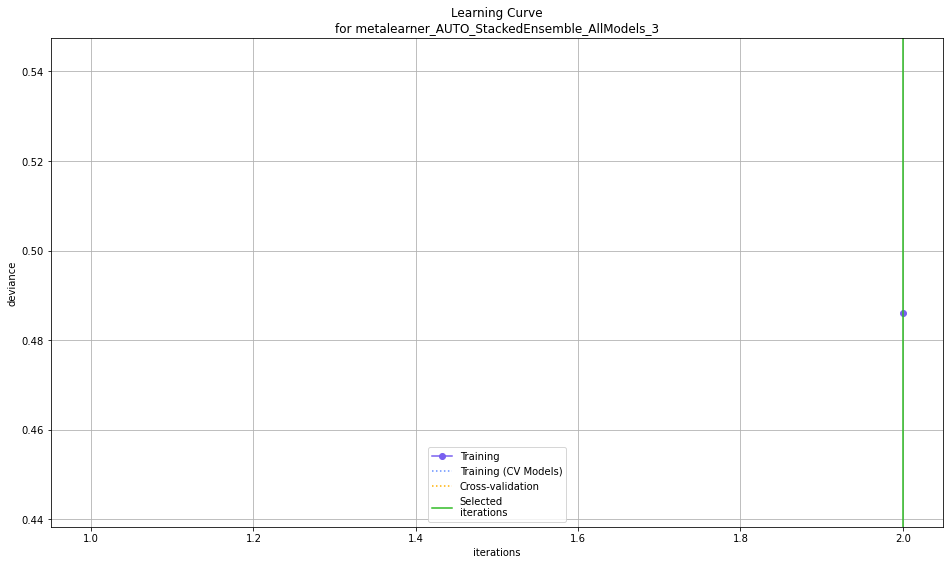

In [17]:
aml.leader.learning_curve_plot()

In [18]:
aml.leader.permutation_importance_plot(df)

KeyboardInterrupt: 